In [1]:
#%matplotlib inline
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.linalg import svd
import matplotlib as mpl
import time
import sys
from math import factorial
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=30)
mpl.rc('ytick',labelsize=30)

### Linestyles ###
colors={'red':(241/255.,88/255.,84/255.),\
        'orange':(250/255,164/255.,58/255.),\
        'pink':(241/255,124/255.,176/255.),\
        'brown':(178/255,145/255.,47/255.),\
        'purple':(178/255,118/255.,178/255.),\
        'green':(96/255,189/255.,104/255.),\
        'darkgreen':(70/255,165/255.,80/255.),\
        'blue':(93/255,165/255.,218/255.),\
        'darkblue':(70/255,140/255.,195/255.),\
        'yellow':(222/255., 207/255., 63/255),\
        'black':(0.,0.,0.)}
collab = ['purple','blue','green','orange',"red",'black']
linewidth = [2,2,3,3,4]
linestyle = ['solid','dashed','dashdot','dotted','solid']

/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:230: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:232: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:234: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:236: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


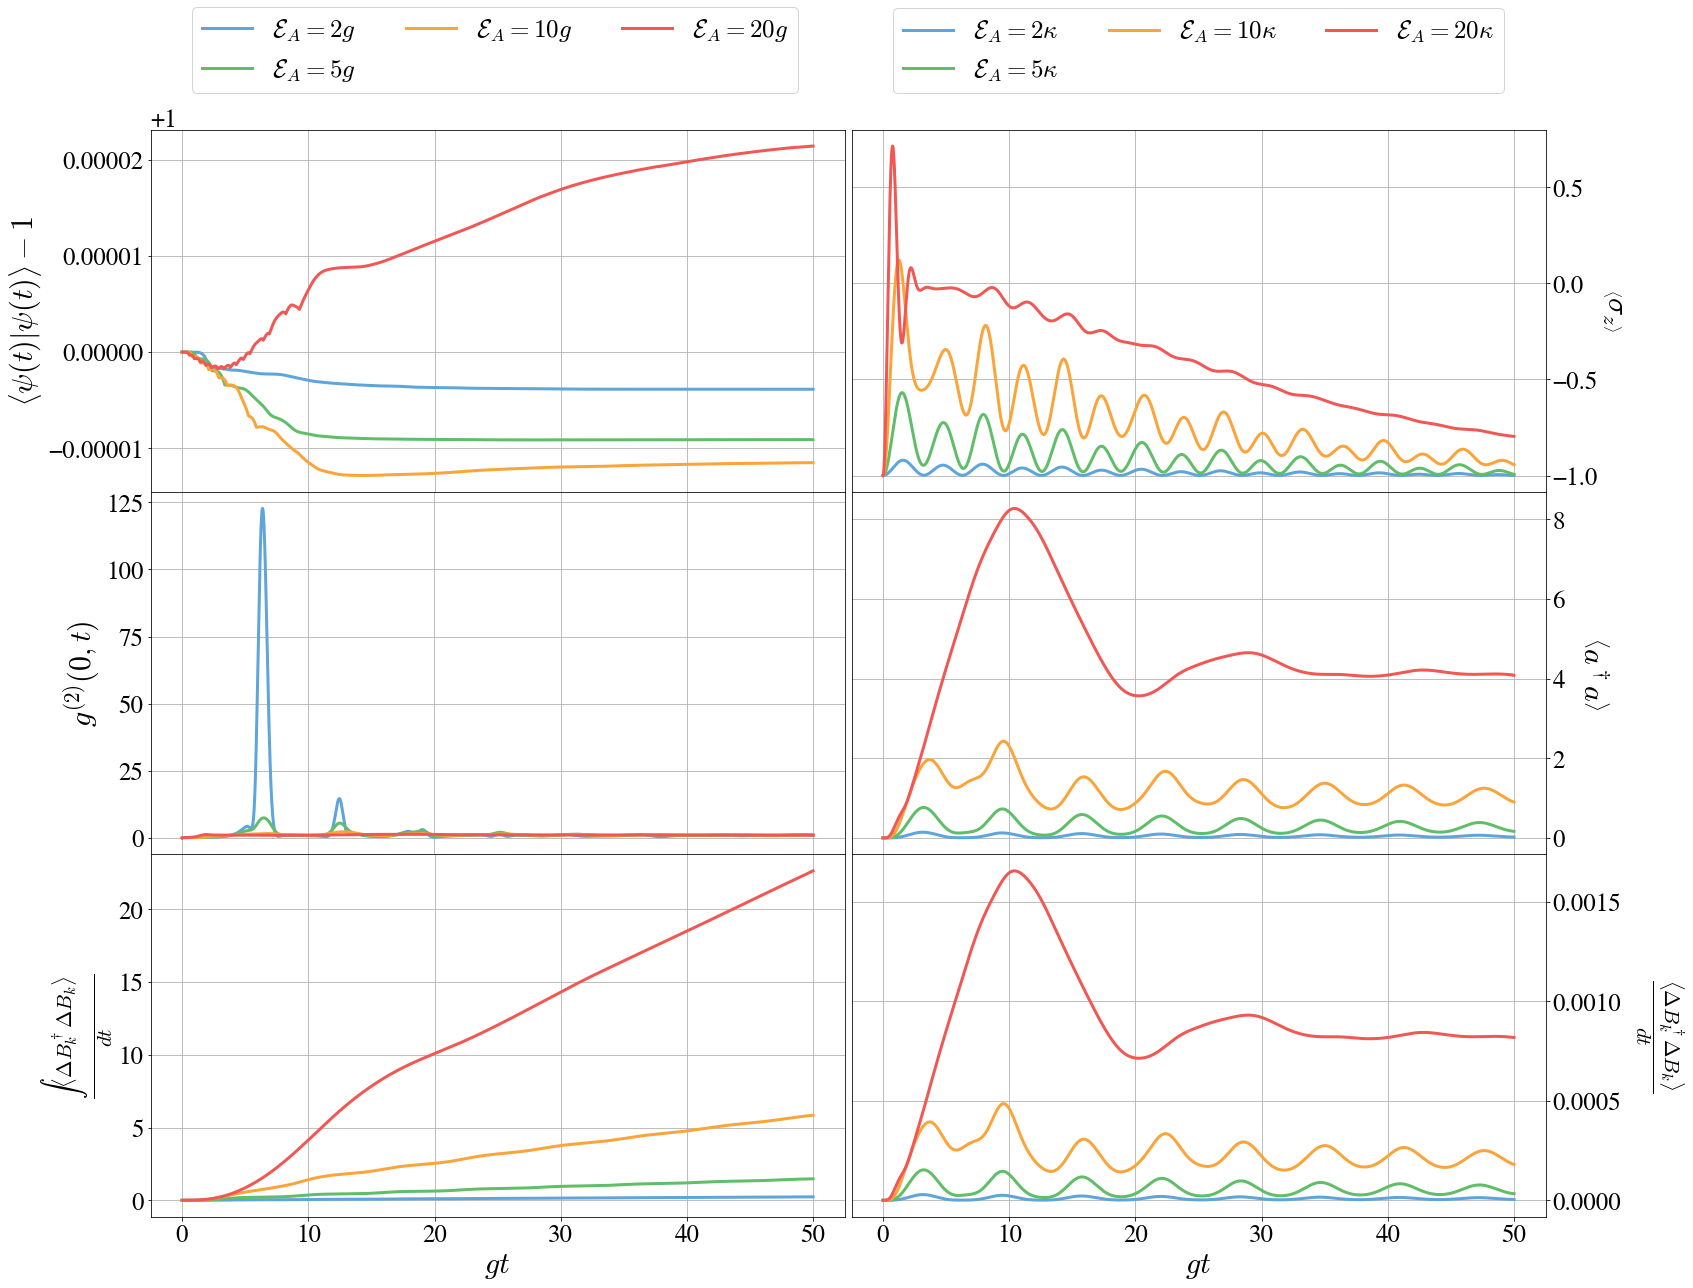

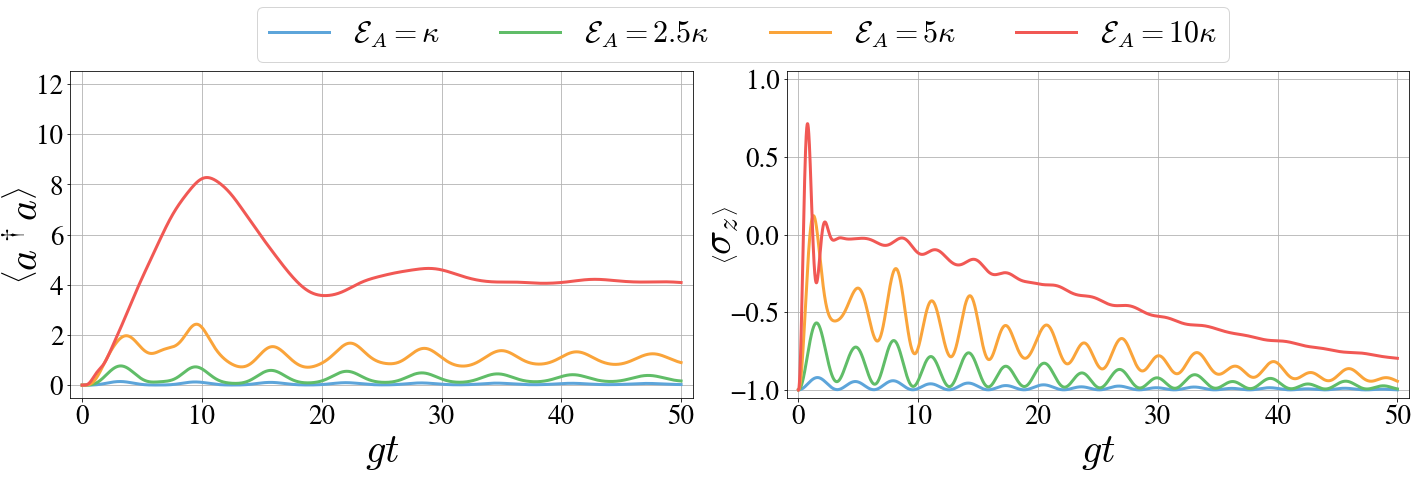

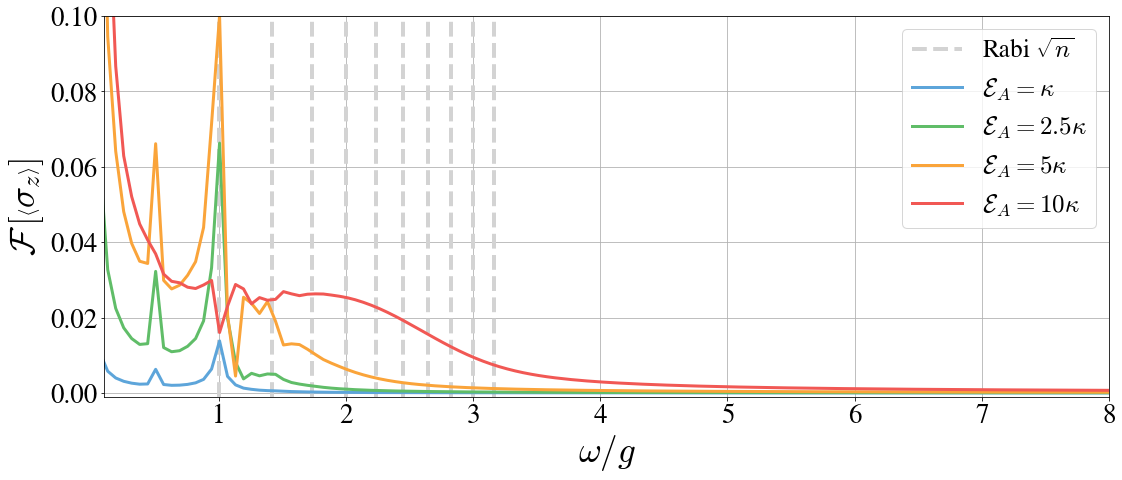

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from io import BytesIO
mpl.rc('xtick',labelsize=25)
mpl.rc('ytick',labelsize=25)

def conv(x):
    return x.replace('+-', '-').encode()

nofb=True
constr=False
destr=False
irrel=False

if nofb==True:
    Ome1 = np.genfromtxt((conv(x) for x in \
                          open("../Data/JC+fb/Old/JC+fb_gL=100p1000_gR=0p1000_g=10p10_phi=0p10pi_initind=0_ome=1p10_omc=0p10_L=1.txt")),dtype=complex)
    Ome2 = np.genfromtxt((conv(x) for x in \
                          open("../Data/JC+fb/Old/JC+fb_gL=100p1000_gR=0p1000_g=10p10_phi=0p10pi_initind=0_ome=2p10_omc=0p10_L=1.txt")),dtype=complex)
    Ome5 = np.genfromtxt((conv(x) for x in \
                          open("../Data/JC+fb/Old/JC+fb_gL=100p1000_gR=0p1000_g=10p10_phi=0p10pi_initind=0_ome=5p10_omc=0p10_L=1.txt")),dtype=complex)
    Ome10 = np.genfromtxt((conv(x) for x in \
                          open("../Data/JC+fb/Old/JC+fb_gL=100p1000_gR=0p1000_g=10p10_phi=0p10pi_initind=0_ome=10p10_omc=0p10_L=1.txt")),dtype=complex)
    Ome20 = np.genfromtxt((conv(x) for x in \
                          open("../Data/JC+fb/Old/JC+fb_gL=100p1000_gR=0p1000_g=10p10_phi=0p10pi_initind=0_ome=20p10_omc=0p10_L=1.txt")),dtype=complex)
    Ome50 = np.genfromtxt((conv(x) for x in \
                          open("../Data/JC+fb/Old/JC+fb_gL=100p1000_gR=0p1000_g=10p10_phi=0p10pi_initind=0_ome=50p10_omc=0p10_L=1.txt")),dtype=complex)
elif destr==True:
    Ome1 = np.genfromtxt((conv(x) for x in \
                          open("../Data/JC+fb/Old/JC+fb_gL=20p1000_gR=80p1000_g=10p10_phi=0p10pi_initind=0_ome=1p10_omc=0p10_L=20.txt")),dtype=complex)
    Ome2 = np.genfromtxt((conv(x) for x in \
                          open("../Data/JC+fb/Old/JC+fb_gL=20p1000_gR=80p1000_g=10p10_phi=0p10pi_initind=0_ome=2p10_omc=0p10_L=20.txt")),dtype=complex)
    Ome5 = np.genfromtxt((conv(x) for x in \
                          open("../Data/JC+fb/Old/JC+fb_gL=20p1000_gR=80p1000_g=10p10_phi=0p10pi_initind=0_ome=5p10_omc=0p10_L=20.txt")),dtype=complex)
    Ome10 = np.genfromtxt((conv(x) for x in \
                          open("../Data/JC+fb/Old/JC+fb_gL=20p1000_gR=80p1000_g=10p10_phi=0p10pi_initind=0_ome=10p10_omc=0p10_L=20.txt")),dtype=complex)
    Ome20 = np.genfromtxt((conv(x) for x in \
                          open("../Data/JC+fb/Old/JC+fb_gL=20p1000_gR=80p1000_g=10p10_phi=0p10pi_initind=0_ome=20p10_omc=0p10_L=20.txt")),dtype=complex)
    Ome50 = np.genfromtxt((conv(x) for x in \
                          open("../Data/JC+fb/Old/JC+fb_gL=20p1000_gR=80p1000_g=10p10_phi=0p10pi_initind=0_ome=50p10_omc=0p10_L=20.txt")),dtype=complex)
elif constr==True:
    Ome1 = np.genfromtxt((conv(x) for x in \
                          open("../Data/JC+fb/Old/JC+fb_gL=20p1000_gR=80p1000_g=10p10_phi=10p10pi_initind=0_ome=1p10_omc=0p10_L=20.txt")),dtype=complex)
    Ome2 = np.genfromtxt((conv(x) for x in \
                          open("../Data/JC+fb/Old/JC+fb_gL=20p1000_gR=80p1000_g=10p10_phi=10p10pi_initind=0_ome=2p10_omc=0p10_L=20.txt")),dtype=complex)
    Ome5 = np.genfromtxt((conv(x) for x in \
                          open("../Data/JC+fb/Old/JC+fb_gL=20p1000_gR=80p1000_g=10p10_phi=10p10pi_initind=0_ome=5p10_omc=0p10_L=20.txt")),dtype=complex)
    Ome10 = np.genfromtxt((conv(x) for x in \
                          open("../Data/JC+fb/Old/JC+fb_gL=20p1000_gR=80p1000_g=10p10_phi=10p10pi_initind=0_ome=10p10_omc=0p10_L=20.txt")),dtype=complex)
    Ome20 = np.genfromtxt((conv(x) for x in \
                          open("../Data/JC+fb/Old/JC+fb_gL=20p1000_gR=80p1000_g=10p10_phi=10p10pi_initind=0_ome=20p10_omc=0p10_L=20.txt")),dtype=complex)
    Ome50 = np.genfromtxt((conv(x) for x in \
                          open("../Data/JC+fb/Old/JC+fb_gL=20p1000_gR=80p1000_g=10p10_phi=10p10pi_initind=0_ome=50p10_omc=0p10_L=20.txt")),dtype=complex)
elif irrel==True:
    Ome1 = np.genfromtxt((conv(x) for x in \
                          open("../Data/JC+fb/Old/JC+fb_gL=20p1000_gR=80p1000_g=10p10_phi=5p10pi_initind=0_ome=1p10_omc=0p10_L=20.txt")),dtype=complex)
    Ome2 = np.genfromtxt((conv(x) for x in \
                          open("../Data/JC+fb/Old/JC+fb_gL=20p1000_gR=80p1000_g=10p10_phi=5p10pi_initind=0_ome=2p10_omc=0p10_L=20.txt")),dtype=complex)
    Ome5 = np.genfromtxt((conv(x) for x in \
                          open("../Data/JC+fb/Old/JC+fb_gL=20p1000_gR=80p1000_g=10p10_phi=5p10pi_initind=0_ome=5p10_omc=0p10_L=20.txt")),dtype=complex)
    Ome10 = np.genfromtxt((conv(x) for x in \
                          open("../Data/JC+fb/Old/JC+fb_gL=20p1000_gR=80p1000_g=10p10_phi=5p10pi_initind=0_ome=10p10_omc=0p10_L=20.txt")),dtype=complex)
    Ome20 = np.genfromtxt((conv(x) for x in \
                          open("../Data/JC+fb/Old/JC+fb_gL=20p1000_gR=80p1000_g=10p10_phi=5p10pi_initind=0_ome=20p10_omc=0p10_L=20.txt")),dtype=complex)
    Ome50 = np.genfromtxt((conv(x) for x in \
                          open("../Data/JC+fb/Old/JC+fb_gL=20p1000_gR=80p1000_g=10p10_phi=5p10pi_initind=0_ome=50p10_omc=0p10_L=20.txt")),dtype=complex)

t_1 = Ome1[:,0]
norm_1 = Ome1[:,1]
exc_1 = Ome1[:,2]
gr_1 = Ome1[:,3]
cav_1 = Ome1[:,4]
g2c_1 = Ome1[:,5]
g2_1 = Ome1[:,6]
NB_1 = Ome1[:,7]
NBout_1 = Ome1[:,8]
t_2 = Ome2[:,0]
norm_2 = Ome2[:,1]
exc_2 = Ome2[:,2]
gr_2 = Ome2[:,3]
cav_2 = Ome2[:,4]
g2c_2 = Ome2[:,5]
g2_2 = Ome2[:,6]
NB_2 = Ome2[:,7]
NBout_2 = Ome2[:,8]
t_5 = Ome5[:,0]
norm_5 = Ome5[:,1]
exc_5 = Ome5[:,2]
gr_5 = Ome5[:,3]
cav_5 = Ome5[:,4]
g2c_5 = Ome5[:,5]
g2_5 = Ome5[:,6]
NB_5 = Ome5[:,7]
NBout_5 = Ome5[:,8]
t_10 = Ome10[:,0]
norm_10 = Ome10[:,1]
exc_10 = Ome10[:,2]
gr_10 = Ome10[:,3]
cav_10 = Ome10[:,4]
g2c_10 = Ome10[:,5]
g2_10 = Ome10[:,6]
NB_10 = Ome10[:,7]
NBout_10 = Ome10[:,8]
t_20 = Ome20[:,0]
norm_20 = Ome20[:,1]
exc_20 = Ome20[:,2]
gr_20 = Ome20[:,3]
cav_20 = Ome20[:,4]
g2_20 = Ome20[:,5]
g2_20 = Ome20[:,6]
NB_20 = Ome20[:,7]
NBout_20 = Ome20[:,8]
t_50 = Ome50[:,0]
norm_50 = Ome50[:,1]
exc_50 = Ome50[:,2]
gr_50 = Ome50[:,3]
cav_50 = Ome50[:,4]
g2_50 = Ome50[:,5]
g2_50 = Ome50[:,6]
NB_50 = Ome50[:,7]
NBout_50 = Ome50[:,8]

fig,ax=plt.subplots(3,2,figsize=(25,20))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.01, hspace=0.)

#ax[0][0].plot(t_1,norm_1,color=colors[collab[0]],lw=3,label="$\Omega_e=\gamma$")
ax[0][0].plot(t_2,norm_2,color=colors[collab[1]],lw=3,label="$\mathcal{E}_A=2g$")
ax[0][0].plot(t_5,norm_5,color=colors[collab[2]],lw=3,label="$\mathcal{E}_A=5g$")
ax[0][0].plot(t_10,norm_10,color=colors[collab[3]],lw=3,label="$\mathcal{E}_A=10g$")
ax[0][0].plot(t_20,norm_20,color=colors[collab[4]],lw=3,label="$\mathcal{E}_A=20g$")
#ax[0][0].plot(t_50,norm_50,color=colors[collab[5]],lw=2,label="$\Omega_e=50\gamma$")
ax[0][0].grid(True)
ax[0][0].set_xlabel(r"$gt$",fontsize = 30)
ax[0][0].set_ylabel(r"$\left\langle\psi(t)|\psi(t)\right\rangle-1$",fontsize = 30)
ax[0][0].legend(loc=(0.06,1.1),ncol=3,fontsize=25)

#ax[0][1].plot(t_1,exc_1-gr_1,color=colors[collab[0]],lw=3,label="$\Omega_e=\gamma$")
ax[0][1].plot(t_2,exc_2-gr_2,color=colors[collab[1]],lw=3,label="$\mathcal{E}_A=2\kappa$")
ax[0][1].plot(t_5,exc_5-gr_5,color=colors[collab[2]],lw=3,label="$\mathcal{E}_A=5\kappa$")
ax[0][1].plot(t_10,exc_10-gr_10,color=colors[collab[3]],lw=3,label="$\mathcal{E}_A=10\kappa$")
ax[0][1].plot(t_20,exc_20-gr_20,color=colors[collab[4]],lw=3,label="$\mathcal{E}_A=20\kappa$")
ax[0][1].set_xlabel(r"$gt$",fontsize = 30)
ax[0][1].set_ylabel(r"$\left\langle\sigma_z\right\rangle$",fontsize = 30,rotation=-90,labelpad=30)
ax[0][1].yaxis.set_label_position("right")
#ax[1][0].plot(t_50,exc_50,color=colors[collab[5]],lw=2,label="$\Omega_e=50\gamma$")
ax[0][1].grid(True)
ax[0][1].legend(loc=(0.06,1.1),ncol=3,fontsize=25)
ax[0][1].yaxis.tick_right()
#ax[1][0].legend(loc="best",fontsize=25)

#ax[2][0].plot(t_1,NBout_1,color=colors[collab[0]],lw=3,label="$\Omega_e=\gamma$")
ax[2][0].plot(t_2,NBout_2,color=colors[collab[1]],lw=3,label="$\mathcal{E}_A=2\kappa$")
ax[2][0].plot(t_5,NBout_5,color=colors[collab[2]],lw=3,label="$\mathcal{E}_A=5\kappa$")
ax[2][0].plot(t_10,NBout_10,color=colors[collab[3]],lw=3,label="$\mathcal{E}_A=10\kappa$")
ax[2][0].plot(t_20,NBout_20,color=colors[collab[4]],lw=3,label="$\mathcal{E}_A=20\kappa$")
#ax[0][1].plot(t_50,NBout_50,color=colors[collab[5]],lw=2,label="$\Omega_e=50\gamma$")
ax[2][0].grid(True)
ax[2][0].set_xlabel(r"$gt$",fontsize = 30)
ax[2][0].set_ylabel(r"$\frac{\int\left\langle\Delta B^\dagger_k\Delta B_k\right\rangle}{dt}$",fontsize = 30)

#ax[1][1].plot(t_1,cav_1,color=colors[collab[0]],lw=3,label="$\Omega_e=\gamma$")
ax[1][1].plot(t_2,cav_2,color=colors[collab[1]],lw=3,label="$\mathcal{E}_A=2\kappa$")
ax[1][1].plot(t_5,cav_5,color=colors[collab[2]],lw=3,label="$\mathcal{E}_A=5\kappa$")
ax[1][1].plot(t_10,cav_10,color=colors[collab[3]],lw=3,label="$\mathcal{E}_A=10\kappa$")
ax[1][1].plot(t_20,cav_20,color=colors[collab[4]],lw=3,label="$\mathcal{E}_A=20\kappa$")
ax[1][1].set_xlabel(r"$gt$",fontsize = 30)
ax[1][1].set_ylabel(r"$\left\langle a^\dagger a\right\rangle$",fontsize = 30,rotation=-90,labelpad=40)
#ax[1][1].plot(t_50,cav_50,color=colors[collab[5]],lw=2,label="$\Omega_e=50\gamma$")
ax[1][1].grid(True)
ax[1][1].yaxis.tick_right()
ax[1][1].yaxis.set_label_position("right")
#ax[1][1].legend(loc="best",fontsize=25)

#ax[1][0].plot(t_1,g2_1,color=colors[collab[0]],lw=3,label="$\Omega_e=\gamma$")
ax[1][0].plot(t_2,g2_2,color=colors[collab[1]],lw=3,label="$\mathcal{E}_A=2\kappa$")
ax[1][0].plot(t_5,g2_5,color=colors[collab[2]],lw=3,label="$\mathcal{E}_A=5\kappa$")
ax[1][0].plot(t_10,g2_10,color=colors[collab[3]],lw=3,label="$\mathcal{E}_A=10\kappa$")
ax[1][0].plot(t_20,g2_20,color=colors[collab[4]],lw=3,label="$\mathcal{E}_A=20\kappa$")
ax[1][0].set_xlabel(r"$gt$",fontsize = 30)
ax[1][0].set_ylabel(r"$g^{(2)}(0,t)$",fontsize = 30)
#ax[1][0].set_ylim(-.1,2.1)
#ax[2][0].plot(t_50,g2_50,color=colors[collab[5]],lw=2,label="$\Omega_e=50\gamma$")
ax[1][0].grid(True)

#ax[2][1].plot(t_1,NB_1,color=colors[collab[0]],lw=3,label="$\Omega_e=\gamma$")
ax[2][1].plot(t_2,NB_2,color=colors[collab[1]],lw=3,label="$\mathcal{E}_A=2\kappa$")
ax[2][1].plot(t_5,NB_5,color=colors[collab[2]],lw=3,label="$\mathcal{E}_A=5\kappa$")
ax[2][1].plot(t_10,NB_10,color=colors[collab[3]],lw=3,label="$\mathcal{E}_A=10\kappa$")
ax[2][1].plot(t_20,NB_20,color=colors[collab[4]],lw=3,label="$\mathcal{E}_A=20\kappa$")
#ax[2][1].plot(t_50,NB_50,color=colors[collab[5]],lw=2,label="$\Omega_e=50\gamma$")
ax[2][1].set_xlabel(r"$gt$",fontsize = 30)
ax[2][1].set_ylabel(r"$\frac{\left\langle \Delta B_k^\dagger\Delta B_k\right\rangle}{dt}$",fontsize = 30,
                    rotation=-90,labelpad=65)
ax[2][1].grid(True)
ax[2][1].yaxis.tick_right()
ax[2][1].yaxis.set_label_position("right")
#ax[2][1].legend(loc="best",fontsize=25)

mpl.rc('xtick',labelsize=27)
mpl.rc('ytick',labelsize=27)
fig,ax=plt.subplots(1,2,figsize=(24,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.15, hspace=0.)

#ax[0].plot(t_1,cav_1,color=colors[collab[0]],lw=3,label="$\Omega_e=\gamma$")
ax[0].plot(t_2,cav_2,color=colors[collab[1]],lw=3,label="$\mathcal{E}_A=\kappa$")
ax[0].plot(t_5,cav_5,color=colors[collab[2]],lw=3,label="$\mathcal{E}_A=2.5\kappa$")
ax[0].plot(t_10,cav_10,color=colors[collab[3]],lw=3,label="$\mathcal{E}_A=5\kappa$")
ax[0].plot(t_20,cav_20,color=colors[collab[4]],lw=3,label="$\mathcal{E}_A=10\kappa$")
ax[0].set_xlabel(r"$gt$",fontsize = 40)
ax[0].set_ylabel(r"$\left\langle a^\dagger a\right\rangle$",fontsize = 40,labelpad=-10)
#ax[1][1].plot(t_50,cav_50,color=colors[collab[5]],lw=2,label="$\Omega_e=50\gamma$")
ax[0].grid(True)
ax[0].set_xticks(np.arange(0, 52, step=10))
ax[0].set_yticks(np.arange(0, 14, step=2))
ax[0].set_ylim(-0.5,12.5)
ax[0].set_xlim(-1,51)
#ax[0].yaxis.tick_right()
#ax[0].yaxis.set_label_position("right")
#ax[1][1].legend(loc="best",fontsize=25)

#ax[1].plot(t_1,exc_1-gr_1,color=colors[collab[0]],lw=3,label="$\Omega_e=\gamma$")
ax[1].plot(t_2,exc_2-gr_2,color=colors[collab[1]],lw=3,label="$\mathcal{E}_A=\kappa$")
ax[1].plot(t_5,exc_5-gr_5,color=colors[collab[2]],lw=3,label="$\mathcal{E}_A=2.5\kappa$")
ax[1].plot(t_10,exc_10-gr_10,color=colors[collab[3]],lw=3,label="$\mathcal{E}_A=5\kappa$")
ax[1].plot(t_20,exc_20-gr_20,color=colors[collab[4]],lw=3,label="$\mathcal{E}_A=10\kappa$")
ax[1].set_xlabel(r"$gt$",fontsize = 40)
ax[1].set_ylabel(r"$\left\langle\sigma_z\right\rangle$",fontsize = 40,labelpad=-10)
#ax[1].yaxis.set_label_position("right")
#ax[1][0].plot(t_50,exc_50,color=colors[collab[5]],lw=2,label="$\Omega_e=50\gamma$")
ax[1].grid(True)
ax[1].set_xticks(np.arange(0, 51, step=10))
ax[1].set_yticks(np.arange(-1, 1.1, step=.5))
ax[0].legend(loc=(0.3,1.03),ncol=5,fontsize=30)
ax[1].set_ylim(-1.05,1.05)
ax[1].set_xlim(-1,51)
#ax[1].yaxis.tick_right()
#ax[1][0].legend(loc="best",fontsize=25)


from scipy.fftpack import fft, ifft

dt=0.002
N_1=len(t_1)-1
N_2=len(t_2)-1
N_5=len(t_5)-1
N_10=len(t_10)-1
N_20=len(t_20)-1

yf_1 = fft(exc_1-gr_1)
xf_1 = np.linspace(0.0, 1.0/(2.0*dt), N_1/2)*np.pi
yf_2 = fft(exc_2-gr_2)
xf_2 = np.linspace(0.0, 1.0/(2.0*dt), N_2/2)*np.pi
yf_5 = fft(exc_5-gr_5)
xf_5 = np.linspace(0.0, 1.0/(2.0*dt), N_5/2)*np.pi
yf_10 = fft(exc_10-gr_10)
xf_10 = np.linspace(0.0, 1.0/(2.0*dt), N_10/2)*np.pi
yf_20 = fft(exc_20-gr_20)
xf_20 = np.linspace(0.0, 1.0/(2.0*dt), N_20/2)*np.pi

fig2,ax2 = plt.subplots(1,figsize=(18,7))

ax2.axvline(x=1,ls="--",color="lightgrey",lw=4, label="Rabi $\sqrt{n}$")
ax2.axvline(x=np.sqrt(2),ls="--",color="lightgrey",lw=4, label='_nolegend_')
ax2.axvline(x=np.sqrt(3),ls="--",color="lightgrey",lw=4, label='_nolegend_')
ax2.axvline(x=np.sqrt(4),ls="--",color="lightgrey",lw=4, label='_nolegend_')
ax2.axvline(x=np.sqrt(5),ls="--",color="lightgrey",lw=4, label='_nolegend_')
ax2.axvline(x=np.sqrt(6),ls="--",color="lightgrey",lw=4, label='_nolegend_')
ax2.axvline(x=np.sqrt(7),ls="--",color="lightgrey",lw=4, label='_nolegend_')
ax2.axvline(x=np.sqrt(8),ls="--",color="lightgrey",lw=4, label='_nolegend_')
ax2.axvline(x=np.sqrt(9),ls="--",color="lightgrey",lw=4, label='_nolegend_')
ax2.axvline(x=np.sqrt(10),ls="--",color="lightgrey",lw=4, label='_nolegend_')
#ax2.plot(xf_1, 2.0/N_1 * np.abs(yf_1[0:int(N_1/2)]),label="$\Omega_e = \gamma$",color=colors[collab[0]],ls="-",lw=3)
ax2.plot(xf_2, 2.0/N_2 * np.abs(yf_2[0:int(N_2/2)]),label="$\mathcal{E}_A = \kappa$",color=colors[collab[1]],ls="-",lw=3)
ax2.plot(xf_5, 2.0/N_5 * np.abs(yf_5[0:int(N_5/2)]),label="$\mathcal{E}_A = 2.5\kappa$",color=colors[collab[2]],ls="-",lw=3)
ax2.plot(xf_10, 2.0/N_10 * np.abs(yf_10[0:int(N_10/2)]),label="$\mathcal{E}_A = 5\kappa$",color=colors[collab[3]],ls="-",lw=3)
ax2.plot(xf_20, 2.0/N_20 * np.abs(yf_20[0:int(N_20/2)]),label="$\mathcal{E}_A = 10\kappa$",color=colors[collab[4]],ls="-",lw=3)


plt.grid()
plt.xlabel(r"$\omega/g$",fontsize=35)
plt.ylabel(r"$\mathcal{F}\, [\left<\sigma_z\right>]$",fontsize=35)
plt.legend(loc="best",fontsize=25)
plt.xlim(.1,8)
plt.ylim(-.001,.1)
plt.show()

/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


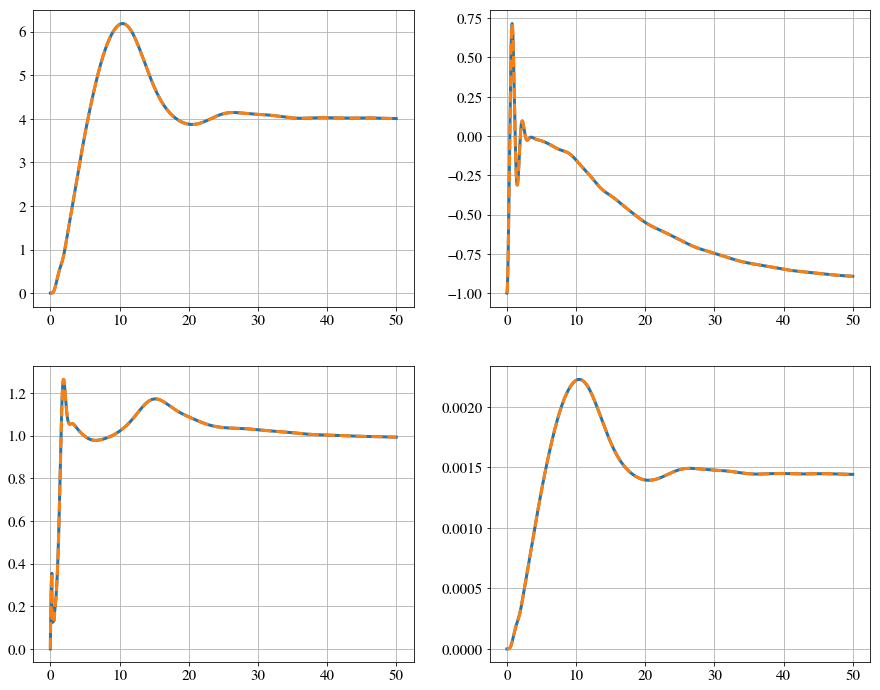

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from io import BytesIO
import matplotlib as mpl
mpl.rc('xtick',labelsize=15)
mpl.rc('ytick',labelsize=15)


def conv(x):
    return x.replace('+-', '-').encode()

Data1 = np.genfromtxt((conv(x) for x in open("./Data/JC10.txt")),dtype=complex)
#Data1o = np.genfromtxt((conv(x) for x in open("../JC+fb/Data/JC+fb_gL=6283p1000_gR=6283p1000_g=31p10_phi=10p10pi_initind=4_ome=0p10_omc=0p10_L=50-2.txt")),dtype=complex)
#Data1o = np.genfromtxt((conv(x) for x in open("../Data/Cluster/evol/JC+fb_gL=20p1000_gR=80p1000_g=10p10_phi=0p10pi_initind=0_ome=20p10_omc=0p10_L=20.txt")),dtype=complex)
Data1o = np.genfromtxt((conv(x) for x in open("../Data/JC+fb_gL=20p1000_gR=80p1000_g=10p10_phi=0p10pi_initind=0_ome=20p10_omc=0p10_L=20.txt")),dtype=complex)


t_1 = Data1[:,0]
norm_1 = Data1[:,1]
exc_1 = Data1[:,2]
gr_1 = Data1[:,3]
cav_1 = Data1[:,4]
g2c_1 = Data1[:,5]
g2_1 = Data1[:,6]
NB_1 = Data1[:,7]
NBout_1 = Data1[:,8]
to_1 = Data1o[:,0]
normo_1 = Data1o[:,1]
exco_1 = Data1o[:,2]
gro_1 = Data1o[:,3]
cavo_1 = Data1o[:,4]
g2co_1 = Data1o[:,5]
g2o_1 = Data1o[:,6]
NBo_1 = Data1o[:,7]
NBouto_1 = Data1o[:,8]
#plt.xlim(0,4)
#plt.ylim (-0.005,0.145)
fig,ax = plt.subplots(2,2,figsize = (15,12))
ax[0][0].plot(t_1,cav_1,lw=3)
ax[0][0].plot(to_1,cavo_1,ls="--",lw=3)
ax[0][0].grid(True)
ax[0][1].plot(t_1,exc_1-gr_1,lw=3)
ax[0][1].plot(to_1,exco_1-gro_1,ls="--",lw=3)
ax[0][1].grid(True)
ax[1][0].plot(t_1,g2_1,lw=3)
ax[1][0].plot(to_1,g2o_1,ls="--",lw=3)
ax[1][0].grid(True)
ax[1][1].plot(t_1,NB_1,lw=3)
ax[1][1].plot(to_1,NBo_1,ls="--",lw=3)
ax[1][1].grid(True)


In [1]:
import sys
print(sys.version)

3.5.4 |Continuum Analytics, Inc.| (default, Aug 14 2017, 13:41:13) [MSC v.1900 64 bit (AMD64)]
